In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import io
import easygui
import sys
import os
import tkinter as tk
from PIL import Image, ImageTk

# Gui box to open image_path

In [154]:
def upload():
    img_path = easygui.fileopenbox()
    # img_path = './hyungwon.jpeg'
    # img_path = './dbd0.jpeg'
    cartoonify(img_path)
# upload()

In [155]:
# easygui.abouteasygui()
# easygui.boolbox()
# easygui.boxes.about.codebox()
# easygui.buttonbox()
# easygui.egdemo()

In [156]:
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QFileDialog
from PyQt5.QtGui import QIcon, QPixmap
from PyQt5.QtCore import pyqtSlot

In [157]:
# dir_ = QFileDialog.getExistingDirectory(None)
# dir_ = QFileDialog.getExistingDirectory(None, 'Select project folder:', 'F:\\', 
#                                         QFileDialog.ShowDirsOnly)

# Store choosed image in form of number

In [158]:
def cartoonify(img_path):
    # store image in form of array
    origin_img = cv2.imread(img_path)
    if origin_img is None:
        print('Can\'t open image, please find another.')
        sys.exit()
    # change bgr=>rgb & change to gray 
    origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(origin_img, cv2.COLOR_RGB2GRAY)
    
    # Transfrom img
    smooth_gray_img = cv2.medianBlur(gray_img, ksize=5)
    # draw edges of img
    edges = cv2.adaptiveThreshold(smooth_gray_img,  
                        maxValue=255,
                        adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                        thresholdType=cv2.THRESH_BINARY, 
                                  blockSize=9, 
                                  C=9 )
    
    # mask image with color
    # remove noise
    color_img = cv2.bilateralFilter(origin_img, d=10,
                            sigmaColor=300, # make it like water color
                           sigmaSpace=300) # remove roughness
    
    # combination to cartoon
    cartoon_img = cv2.bitwise_and(color_img, color_img,
                                 mask=edges)
    # resized_img = cv2.resize(cartoon_img, (940, 540))
    # plt.imshow(edges, cmap='gray')
    # plt.imshow(cartoon_img, cmap='gray')
    
    # show all images we modified
    images = [origin_img, gray_img, smooth_gray_img,
             edges, color_img, cartoon_img]
    fig, axs = plt.subplots(2,3, figsize=(8,8), subplot_kw={
        'xticks':[], 'yticks':[]
    }, gridspec_kw=dict(hspace=.1, wspace=.1))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
    plt.show()
    
    
    save_1 = tk.Button(top, text='Save', 
                      command=lambda : save(img_path=img_path, 
                                           img=cartoon_img))
    save_1.pack()
# upload()

In [159]:
# Split "ext" not split text
os.path.splitext('./hyungwon.jpeg') # split root & .ext

('./hyungwon', '.jpeg')

In [160]:
# os.path.dirname('../../Sklearn learn/Clustering/')
os.path.dirname('Data Science/A/fileN.txt')

'Data Science/A'

In [161]:
print(os.path.join('/home', 'user/Desktop', ))
print(os.path.join('/home', 'user/Desktop', 'file.txt' ))
print(os.path.join('/home', 'user/Desktop', 'file.txt', 'hahahaha'))


/home/user/Desktop
/home/user/Desktop/file.txt
/home/user/Desktop/file.txt/hahahaha


In [162]:
os.path.basename('/home/wewe/file555.manim')

'file555.manim'

In [163]:
os.path.splitext(os.path.basename('/home/wewe/file555.manim'))[0]

'file555'

In [164]:
def save(img, img_path):
    dir_name = os.path.dirname(img_path)
    name_surfix = '_catoonified'
    ext = os.path.splitext(img_path)[1] # [1] is .jpg, .png & [0] is img_name
    old_file_name = os.path.splitext(os.path.basename(img_path))[0]
    to_save_path = os.path.join(dir_name, old_file_name+name_surfix+ext)
    cv2.imwrite(to_save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    msg_after_done = f'Cartoonified image\'s name is {old_file_name} \n \
    at {to_save_path}'
    # tk.messagebox.showinfo(title=None, message=msg_after_done)
    

# Main App

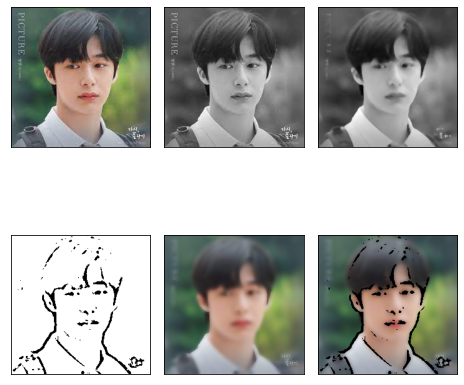

In [165]:
top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify your image!')
top.configure(background='white')
label = tk.Label(top)

upload = tk.Button(top, text='Cartoonify', command=upload)
upload.pack(side=tk.TOP)



top.mainloop()

# Whole App

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import io
import easygui
import sys
import os
import tkinter as tk
from PIL import Image, ImageTk

def upload():
    img_path = easygui.fileopenbox()
    cartoonify(img_path)

def cartoonify(img_path):
    origin_img = cv2.imread(img_path)
    if origin_img is None:
        print('Can\'t open image, please find another.')
        sys.exit()
    origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(origin_img, cv2.COLOR_RGB2GRAY)
    
    smooth_gray_img = cv2.medianBlur(gray_img, ksize=5)
    edges = cv2.adaptiveThreshold(smooth_gray_img,  
                        maxValue=255,
                        adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                        thresholdType=cv2.THRESH_BINARY, 
                                  blockSize=9, 
                                  C=9 )
    
    color_img = cv2.bilateralFilter(origin_img, d=10,
                            sigmaColor=300, # make it like water color
                           sigmaSpace=300) # remove roughness
    cartoon_img = cv2.bitwise_and(color_img, color_img,
                                 mask=edges)
    
    # SAVE
    save_1 = tk.Button(top, text='Save', 
                      command=lambda : save(img_path=img_path, 
                      img=cartoon_img))
    save_1.pack()
   
    # DISPLAY IN TK WINDOW
    img = ImageTk.PhotoImage(Image.fromarray(cartoon_img))
    img_lb.configure(image=img)
    img_lb.image = img 

def save(img, img_path):
    dir_name = os.path.dirname(img_path)
    name_surfix = '_catoonified'
    ext = os.path.splitext(img_path)[1] 
    old_file_name = os.path.splitext(os.path.basename(img_path))[0]
    to_save_path = os.path.join(dir_name, old_file_name+name_surfix+ext)
    cv2.imwrite(to_save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    

top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify your image!')
top.configure(background='white')
label = tk.Label(top)

upload = tk.Button(top, text='Cartoonify', command=upload)
upload.pack(side=tk.TOP)

# canvas = tk.Canvas(top)
# canvas.pack()
img_lb = tk.Label(top)
img_lb.pack()

# ori_img_lb = tk.Label(top)
# ori_img_lb.pack()


top.mainloop()